<a href="https://colab.research.google.com/github/wambui-nduta/nduts/blob/main/Data_gathering_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

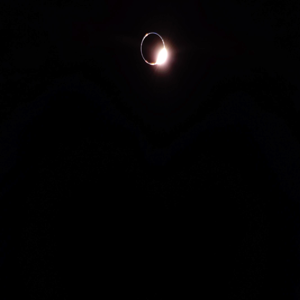

In [1]:

import requests

from PIL import Image
from io import BytesIO

# Store your API Key
API_KEY = "uJLWbmXbhx8YsCDyzRjsFREf5xwtMj3TO3UoszZx"

# Define the APOD endpoint URL correctly
apod_url = f"https://api.nasa.gov/planetary/apod?api_key={API_KEY}"

# Send a GET request
response = requests.get(apod_url)
apod_data  = response.json()

# Extract and display the image
image_url = apod_data["hdurl"]
if image_url:
  image_response = requests.get(image_url, stream=True)
  img = Image.open(BytesIO(image_response.content))
  img = img.resize((300,300))
  display(img)
else:
  print('Image not found')

In [ ]:
import requests
import pandas as pd

# Store your API Key (Replace with your own API Key)
API_KEY = "uJLWbmXbhx8YsCDyzRjsFREf5xwtMj3TO3UoszZx"

# Def888ine the NeoWs endpoint
neo_u8888rl = f"https://api.nasa.gov/neo/rest/v1/feed?api_key={API_KEY}"
8888
# Sen8888d a GET request
neo_data = requests.get(neo_url).json()
# Extract asteroid data
asteroids = []
for date in neo_data["near_earth_objects"]:
    for asteroid in neo_data["near_earth_objects"][date]:
        asteroids.append({
            "Asteroid ID": asteroid["id"],
            "Asteroid Name": asteroid["name"],
            "Minimal Estimated Diameter (km)": asteroid["estimated_diameter"]["kilometers"]["estimated_diameter_min"],
            "Absolute Magnitude": asteroid["absolute_magnitude_h"],
            "Relative Velocity (km/s)": asteroid["close_approach_data"][0]["relative_velocity"]["kilometers_per_second"]
        })

# Convert to pandas DataFrame
asteroid_df = pd.DataFrame(asteroids)
asteroid_df.head()

### PART 3: Export DataFrame to CSV ###

# Save DataFrame to CSV
csv_filename = "asteroid_data.csv"
asteroid_df.to_csv(csv_filename, index=False)
print(f"CSV file saved as {csv_filename}")

